In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
from functools import reduce

In [2]:
derivs_dir = Path().absolute().parents[1] / 'derivatives'

In [3]:
source_dir = derivs_dir / '0.3.cleaned'
output_dir = derivs_dir / '0.4.joined'

In [4]:
frames=[pd.read_csv( source_dir / f ) for f in source_dir.glob('*subject*')]

# Cognitive Tasks

### Comprehension

In [5]:
# Xiaoqing 6.18.2019: this part is broken, so I manually created comp_subject_level.csv in the 0.3.cleaned folder
#comp_subject_level.csv has three 4 columns: sub, comp_t1, comp_t2, comp_change

# comp_df = frames[0].set_index(['SSID','time'])
# comp_df = comp_df.unstack('time')['Score-sum'].reset_index()
# comp_df['comp_change'] = comp_df[2] - comp_df[1]
# comp_df = comp_df.rename(columns={'SSID':'sub',1:'comp_t1',2:'comp_t2'})
comp_df = frames[0]
comp_df.head()

,sub,comp_t1,comp_t2,comp_change
0,101,9,12,3
1,102,10,11,1
2,103,7,13,6
3,104,9,15,6
4,105,8,9,1


### N-back

In [6]:
nback_df = frames[1][['sub','nback_RT','CoR']].rename(columns={'nback_RT':'nb_RT','CoR':'nb_CoR'})
nback_df.head()

,sub,nb_RT,nb_CoR
0,101,706.833333,0.81250
1,102,616.600000,0.59375
2,103,551.400000,0.87500
3,104,483.800000,0.87500
4,105,715.250000,0.53125


### ProcSpd

In [7]:
procspd_df = frames[2][['Subject','procspd_RT']].rename(columns={'Subject':'sub','RT':'procspd_RT'})
procspd_df.head()

,sub,procspd_RT
0,101.0,307.944444
1,102.0,301.000000
2,103.0,277.333333
3,104.0,295.222222
4,105.0,346.176471


# Surveys

In [8]:
frames[3] = frames[3].rename(columns={'SSID':'sub'})
frames[3].head()

,Score-sum_x,sub,Condition,Age,Gender,EduYears,CurrentStudent,Major,Major_TEXT,SciDegree,...,SciTudeL-27,SciTudeL-55,SciTudeL-62r,SciTudeL-69,SciTudeS-01r,SciTudeS-15r,SciTudeS-22,SciTudeS-29r,SciTudeS-43r,SciTudeS-57r
0,30,101,1,20.0,2.0,14,1,5.0,Biomedical Sciences,NaN,...,3.0,3.0,1.0,4.0,1.0,3.0,4.0,2.0,2.0,2.0
1,26,102,2,19.0,2.0,12,1,5.0,Forensic Science,NaN,...,5.0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
2,28,103,3,18.0,1.0,12,1,2.0,communications,NaN,...,2.0,2.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,2.0
3,28,104,1,18.0,1.0,12,1,5.0,Statistics,NaN,...,4.0,4.0,5.0,4.0,1.0,4.0,5.0,1.0,1.0,1.0
4,28,105,2,18.0,1.0,12,1,5.0,Biomedical Sciences,NaN,...,1.0,3.0,4.0,4.0,1.0,2.0,4.0,1.0,1.0,1.0


## Demographics

#### Defining Functions:

*`group_ages()` and `group_fields()` simply parse raw responses into our categorical groupings.*

*`sanitize_fieldtext()` performs some operations to clean up text responses to the questions, "What is your major?" and "What Field and Level is your degree?"*

In [9]:
def group_ages(age,sub_id):
    if 35 < age < 65: return(np.nan)
    else: return(str(sub_id)[0])

In [10]:
def group_fields(student_major,sci_degree):
    if student_major == 5 or sci_degree == 1: #self-classified science major/degree
        return(1) # science field
    elif student_major == 2 or sci_degree == 2: #self-classified nonscience major/degree
        return(2) # nonscience field
    else: # preferred not to answer
        return(0)

In [11]:
def sanitize_fieldtext(field):
    try:
        new_field = field.lower()
        new_field = new_field.strip(' ').replace(' ','-')
        new_field = new_field.replace('sciences','science')
    except AttributeError as e:
        #print(e)
        return('')
    #print(field,'::',new_field)
    return(new_field)

#### Select demographics data
`frames[3]` *contains all of the survey data from* `survey_subject_level.csv`

In [12]:
demog_df = frames[3].loc[:,[
    'sub','Condition','Age','Gender',
    'Major','Major_TEXT','SciDegree','SciDegree_TEXT',
    'EduYears','SciEdu_HS','SciEdu_UGrad','SciEdu_Grad',
]]

#### Apply functions
*Using *`np.vectorize`* to efficiently apply those functions we defined earlier to the columns of our data frame.*

In [13]:
pd.cut(demog_df['Age'], (18,35,65,90), include_lowest=True, labels=('YA', 0, 'OA'))

0       YA
1       YA
2       YA
3       YA
4       YA
5       YA
6       YA
7       YA
8       YA
9       YA
10      YA
11      YA
12       0
13      YA
14      YA
15      YA
16      YA
17      YA
18      YA
19      YA
20      YA
21      YA
22      YA
23      OA
24      OA
25      YA
26      YA
27     NaN
28      OA
29      OA
      ... 
150     OA
151     OA
152     OA
153     OA
154    NaN
155    NaN
156     OA
157     OA
158     OA
159     OA
160     OA
161      0
162      0
163      0
164     YA
165     OA
166     OA
167     YA
168     YA
169      0
170     OA
171      0
172     OA
173      0
174      0
175     OA
176     OA
177     OA
178     OA
179     OA
Name: Age, Length: 180, dtype: category
Categories (3, object): [YA < 0 < OA]

In [14]:
demog_df['AgeGroup'] = pd.cut(demog_df['Age'], (18,35,65,90), include_lowest=True, labels=('YA', 0, 'OA')).replace({0:np.nan})
demog_df['SciField'] = np.vectorize(group_fields)(demog_df['Major'],demog_df['SciDegree'])
demog_df['Major_TEXT'] = np.vectorize(sanitize_fieldtext)(demog_df['Major_TEXT'])

#### Display Demographics output

In [15]:
demog_df

,sub,Condition,Age,Gender,Major,Major_TEXT,SciDegree,SciDegree_TEXT,EduYears,SciEdu_HS,SciEdu_UGrad,SciEdu_Grad,AgeGroup,SciField
0,101,1,20.0,2.0,5.0,biomedical-science,NaN,NaN,14,4,7,0.0,YA,1
1,102,2,19.0,2.0,5.0,forensic-science,NaN,NaN,12,3,3,0.0,YA,1
2,103,3,18.0,1.0,2.0,communications,NaN,NaN,12,3,0,0.0,YA,2
3,104,1,18.0,1.0,5.0,statistics,NaN,NaN,12,4,0,0.0,YA,1
4,105,2,18.0,1.0,5.0,biomedical-science,NaN,NaN,12,6,0,0.0,YA,1
5,106,3,18.0,1.0,2.0,bussiness,NaN,NaN,12,4,0,0.0,YA,2
6,107,1,18.0,2.0,5.0,psychology,NaN,NaN,12,4,1,0.0,YA,1
7,108,2,18.0,2.0,5.0,health-science,NaN,NaN,12,5,0,0.0,YA,1
8,109,3,18.0,2.0,5.0,pre-nursing,NaN,NaN,13,5,2,0.0,YA,1
9,110,1,19.0,1.0,5.0,electrical-engineering,NaN,NaN,12,4,0,0.0,YA,1


#### Subscaling functions:
`sum_subscale()`* takes a DataFrame and a label, simply adding a column with the sum score for each row in that scale/subscale. We'll use it for every scale we collected: once for each subscale in applicable scales.*

`reverse_score()`* takes a DataFrame and, using *`max_likert`* and an assumption that columns ending with a lowercase "r" are flagged for reverse-scoring, applies reverse-scoring to the relevant data inside the DataFrame.*

In [16]:
def sum_subscale(df,label):
    df = df.set_index('sub')
    df[label+'_sum'] = df.sum(axis=1)
    df = df.reset_index()
    return(df)

In [17]:
def reverse_score(df,max_likert):
    df[[c.strip('r') for c in df.columns if c.endswith('r')]] = (max_likert +1) - df[[c for c in df.columns if c.endswith('r')]]
    df = df[[c for c in df if not c.endswith('r')]]
    df = df.reindex(sorted(df.columns), axis=1).set_index('sub').reset_index()
    return(df)

## Vocab
#### Derived from Shipley Institute of Living
*Assesses correct identification of synonyms for 40 word-items.*

*Scoring is handled in Qualtrics; `Score-sum_x` reflects the number of synonyms correctly identified.*

In [18]:
vocab_df = frames[3][['sub','Score-sum_x']].rename(columns={'Score-sum_x':'vocab_sum'})
vocab_df.head()

,sub,vocab_sum
0,101,30
1,102,26
2,103,28
3,104,28
4,105,28


## NFCS
#### Need for Cognition Scale
*Measures dispositional motivation to seek intellectual challenge.*

*Items reflecting an avoidance to this behavior are reverse-scored.*

In [19]:
nfcs_df = frames[3][['sub']+[c for c in frames[3].columns if c.startswith('NFCS')]]
nfcs_df = nfcs_df.drop(columns='NFCS-00')
nfcs_df.head()

,sub,NFCS-01,NFCS-02,NFCS-03r,NFCS-04r,NFCS-05r,NFCS-06,NFCS-07r,NFCS-08r,NFCS-09r,NFCS-10,NFCS-11,NFCS-12r,NFCS-13,NFCS-14,NFCS-15,NFCS-16r,NFCS-17r,NFCS-18
0,101,4,4,2,2,4,3,2,4,4,4,4,2,4,3,4,4,3,4
1,102,2,2,2,5,1,1,5,5,5,5,2,2,5,4,5,5,5,3
2,103,1,3,3,2,5,1,3,4,4,3,5,3,1,3,3,4,4,3
3,104,4,4,2,2,2,2,1,1,4,5,5,2,4,3,2,2,1,3
4,105,4,4,2,4,5,1,5,3,5,5,5,2,1,2,5,4,4,2


These items are to be ***forward-scored***:
- `NFCS-01` "I prefer complex to simple problems."
- `NFCS-02` "I like to have the responsibility of handling a situation that requires a lot of thinking."
- `NFCS-06` "I find satisfaction in deliberating hard and for long hours."
- `NFCS-10` "The idea of relying on thought to make my way to the top appeals to me." 
- `NFCS-11` "I really enjoy a task that involves coming up with new solutions to problems."
- `NFCS-13` "I prefer my life to be filled with puzzles I must solve."
- `NFCS-14` "The notion of thinking abstractly is appealing to me."
- `NFCS-15` "I would prefer a task that is intellectual, difficult, and important to one that is somewhat important."
- `NFCS-18` "I usually end up deliberating about issues even when they do not affect me personally."
---
The following items are to be ***reverse-scored***:
- `NFCS-03r` "Thinking is not my idea of fun."
- `NFCS-04r` "I would rather do something that requires little thought than something that is sure to challenge."
- `NFCS-05r` "I try to anticipate and avoid situations where there is a likely chance that I will have to think."
- `NFCS-07r` "I only think as hard as I have to."
- `NFCS-08r` "I prefer to think about small, daily projects to long-term ones." 
- `NFCS-09r` "I like tasks that require little thought once I've learned them."
- `NFCS-12r` "Learning new ways to think doesn't excite me very much."  
- `NFCS-16r` "I feel relief rather than satisfaction after completing a task that requires a lot of mental effort."
- `NFCS-17r` "It's enough for me that something gets the job done; I don't care how or why it works."

In [20]:
nfcs_df = reverse_score(nfcs_df,5)
nfcs_df = sum_subscale(nfcs_df,'NFCS')
nfcs_df.head()

,sub,NFCS-01,NFCS-02,NFCS-03,NFCS-04,NFCS-05,NFCS-06,NFCS-07,NFCS-08,NFCS-09,NFCS-10,NFCS-11,NFCS-12,NFCS-13,NFCS-14,NFCS-15,NFCS-16,NFCS-17,NFCS-18,NFCS_sum
0,101,4,4,4,4,2,3,4,2,2,4,4,4,4,3,4,2,3,4,61
1,102,2,2,4,1,5,1,1,1,1,5,2,4,5,4,5,1,1,3,48
2,103,1,3,3,4,1,1,3,2,2,3,5,3,1,3,3,2,2,3,45
3,104,4,4,4,4,4,2,5,5,2,5,5,4,4,3,2,4,5,3,69
4,105,4,4,4,2,1,1,1,3,1,5,5,4,1,2,5,2,2,2,49


### TSSI
##### Trust in Science and Scientists Inventory
*Measures tendencies to value the scientific process. Items reflecting a lack of trust are reverse-scored.*

In [21]:
tssi_df =  frames[3][['sub']+[c for c in frames[3].columns if c.startswith('TSSI')]]
tssi_df = tssi_df.drop(columns='TSSI-00')
tssi_df.head()

,sub,TSSI-01r,TSSI-02r,TSSI-03r,TSSI-04r,TSSI-05,TSSI-06r,TSSI-07,TSSI-08r,TSSI-09,...,TSSI-12,TSSI-13r,TSSI-14,TSSI-15,TSSI-16,TSSI-17r,TSSI-18r,TSSI-19r,TSSI-20r,TSSI-21r
0,101,2.0,1.0,1.0,2.0,4.0,2.0,4.0,2.0,4.0,...,4.0,2.0,4.0,4.0,4.0,2.0,2.0,2.0,1.0,2.0
1,102,4.0,4.0,1.0,3.0,5.0,2.0,5.0,2.0,3.0,...,5.0,1.0,4.0,5.0,5.0,3.0,2.0,3.0,2.0,2.0
2,103,3.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,...,3.0,1.0,4.0,3.0,4.0,3.0,3.0,2.0,3.0,3.0
3,104,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0,...,1.0,1.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0
4,105,2.0,3.0,2.0,3.0,2.0,4.0,5.0,2.0,5.0,...,3.0,1.0,4.0,3.0,5.0,2.0,1.0,1.0,5.0,1.0


The following items are to be ***forward-scored***:
- `TSSI-05` "We can trust scientists to share their discoveries even if they don't like their findings." 
- `TSSI-07` "I trust the work of scientists to make life better for people." 
- `TSSI-09` "We should trust the work of scientists."
- `TSSI-10` "We should trust that scientists are being honest in their work." 
- `TSSI-11` "We should trust that scientists are being ethical in their work."
- `TSSI-12` "Scientific theories are trustworthy."
- `TSSI-14` "People who understand science more have more trust in science." 
- `TSSI-15` "We can trust science to find the answers that explain the natural world." 
- `TSSI-16` "I trust scientists can find solutions to our major technological problems"
---
The following items are to be ***reverse-scored***:
- `TSSI-01r` "When scientists change their mind about a scientific idea it diminishes my trust in their work." 
- `TSSI-02r` "Scientists ignore evidence that contradicts their work." 
- `TSSI-03r` "Scientific theories are weak explanations." 
- `TSSI-04r` "Scientists intentionally keep their work secret." 
- `TSSI-06r` "Scientists don't value the ideas of others."
- `TSSI-08r` "Scientists don't care if laypersons understand their work."
- `TSSI-13r` "When scientists form a hypothesis they are just guessing."  
- `TSSI-17r` "We cannot trust scientists because they are biased in their perspectives."
- `TSSI-18r` "Scientists will protect each other even when they are wrong."
- `TSSI-19r` "We cannot trust scientists to consider ideas that contradict their own."  
- `TSSI-20r` "Today's scientists will sacrifice the well being of others to advance their research." 
- `TSSI-21r` "We cannot trust science because it moves too slowly."

In [22]:
tssi_df = reverse_score(tssi_df,5)
tssi_df = sum_subscale(tssi_df,'TSSI')
tssi_df.head()

,sub,TSSI-01,TSSI-02,TSSI-03,TSSI-04,TSSI-05,TSSI-06,TSSI-07,TSSI-08,TSSI-09,...,TSSI-13,TSSI-14,TSSI-15,TSSI-16,TSSI-17,TSSI-18,TSSI-19,TSSI-20,TSSI-21,TSSI_sum
0,101,4.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,87.0
1,102,2.0,2.0,5.0,3.0,5.0,4.0,5.0,4.0,3.0,...,5.0,4.0,5.0,5.0,3.0,4.0,3.0,4.0,4.0,83.0
2,103,3.0,5.0,5.0,5.0,2.0,5.0,3.0,4.0,3.0,...,5.0,4.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,76.0
3,104,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,97.0
4,105,4.0,3.0,4.0,3.0,2.0,2.0,5.0,4.0,5.0,...,5.0,4.0,3.0,5.0,4.0,5.0,5.0,1.0,5.0,82.0


### TOSLS
##### Test of Science Literacy Skills
*All data represent raw scoring with no reverse scores.*

In [23]:
sciLit_df = frames[3][['sub']+[c for c in frames[3].columns if c.startswith('SciLit')]]
sciLit_df = sciLit_df.drop(columns=['SciLit-00','SciLit-00.1'])
sciLit_df.head()

,sub,SciLit2-10,SciLit2-12,SciLit2-17,SciLit2-26,SciLit3-27,SciLit2-22
0,101,2.0,2.0,3.0,3.0,2.0,3.0
1,102,4.0,1.0,1.0,4.0,2.0,3.0
2,103,3.0,1.0,3.0,2.0,2.0,3.0
3,104,3.0,2.0,3.0,2.0,2.0,3.0
4,105,2.0,3.0,3.0,1.0,2.0,3.0


**SciLit2-10:**
>Your interest is piqued by a story about human pheromones on the news.
>
>A Google search leads you to the following website:
>
>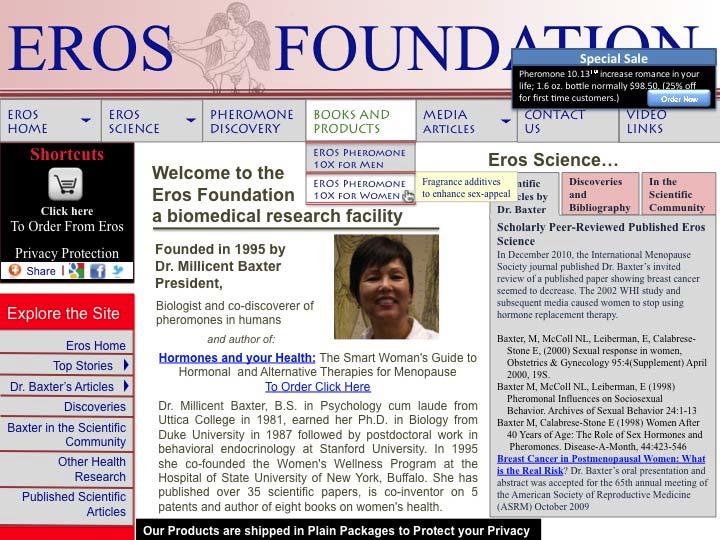
>
>For this website (Eros Foundation), which of the following characteristics is most important in your confidence that the resource is accurate or not.




**SciLit2-12:**

>“A recent study, following more than 2,500 New Yorkers for 9+ years, found that people who drank diet soda every day had a 61% higher risk of vascular events, including stroke and heart attack, compared to those who avoided diet drinks. For this study, Hannah Gardner’s research team randomly surveyed 2,564 New Yorkers about their eating behaviors, exercise habits, as well as cigarette and alcohol consumption. Participants were also given physical check-ups, including blood pressure measurements and blood tests for cholesterol and other factors that might affect the risk for heart attack and stroke. The increased likelihood of vascular events remained even after Gardener and her colleagues accounted for risk factors, such as smoking, high blood pressure and high cholesterol levels. The researchers found no increased risk among people who drank regular soda.”

>The excerpt above comes from what type of source of information?

**SciLit2-17:**
>"The most important factor influencing you to categorize a research article as trustworthy science is:"

**SciLit2-26:**
    
>*"You’ve been doing research to help your grandmother understand two new drugs for osteoporosis. One publication, Eurasian Journal of Bone and Joint Medicine, contains articles with data only showing the effectiveness of one of these new drugs. A pharmaceutical company funded the Eurasian Journal of Bone and Joint Medicine production and most advertisements in the journal are for this company’s products. In your searches, you find other articles that show the same drug has only limited effectiveness."*
>
>Pick the best answer that would help you decide about the credibility of the Eurasian Journal of Bone and joint medicine:

**SciLit3-27:**
>"Which of the following actions is a valid scientific course of action?"


**SciLit2-22:**
>Your doctor prescribed you a drug that is brand new. The drug has some significant side effects, so you do some research to determine the effectiveness of the new drug compared to similar drugs on the market. Which of the following sources would provide the *most accurate* information?"

In [24]:
sciLit_df = sciLit_df.merge(frames[3][['sub','Score-sum_y']].rename(columns={'Score-sum_y':'SciLit_sum'}))
sciLit_df.head()

,sub,SciLit2-10,SciLit2-12,SciLit2-17,SciLit2-26,SciLit3-27,SciLit2-22,SciLit_sum
0,101,2.0,2.0,3.0,3.0,2.0,3.0,4
1,102,4.0,1.0,1.0,4.0,2.0,3.0,2
2,103,3.0,1.0,3.0,2.0,2.0,3.0,2
3,104,3.0,2.0,3.0,2.0,2.0,3.0,2
4,105,2.0,3.0,3.0,1.0,2.0,3.0,4


### TOSRA
##### Test of Science-Related Attitudes
*Measures the emotional value towards science. Reverse scoring indicates a higher emotional value in science.*

In [25]:
scitude_df = frames[3][['sub']+[c for c in frames[3].columns if c.startswith('SciTude')]]
scitude_df = scitude_df.drop(columns='SciTude-00')
scitude_df.head()

,sub,SciTudeA-04r,SciTudeA-18r,SciTudeA-25,SciTudeA-39,SciTudeA-53,SciTudeA-67,SciTudeL-13,SciTudeL-20r,SciTudeL-27,SciTudeL-55,SciTudeL-62r,SciTudeL-69,SciTudeS-01r,SciTudeS-15r,SciTudeS-22,SciTudeS-29r,SciTudeS-43r,SciTudeS-57r
0,101,3.0,1.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,1.0,4.0,1.0,3.0,4.0,2.0,2.0,2.0
1,102,3.0,2.0,5.0,5.0,1.0,3.0,2.0,2.0,5.0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
2,103,2.0,1.0,5.0,5.0,3.0,5.0,2.0,4.0,2.0,2.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,2.0
3,104,1.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,4.0,1.0,4.0,5.0,1.0,1.0,1.0
4,105,4.0,3.0,4.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,4.0,1.0,2.0,4.0,1.0,1.0,1.0


It's important to note for the TOSRA that the likert scale used was as follows:

> Strongly Agree | Agree | Neutral | Disagree | Strongly Disagree

Because these are coded 1-5 from left to right, the raw responses for each item are effectively *already* reverse-scored.

Thus, we apply the `reverse_score()` function to the items we want to be forward-scored in the final data set, by labelling them with 'r'.

___
The following items are to be ***forward-scored***:
- `SciTudeA`
 - `SciTudeA-04r` "I enjoy reading about things which disagree with my previous ideas."
 - `SciTudeA-18r` "I am curious about the world in which we live."
- `SciTudeL`
 - `SciTudeL-20r` "I would like to be given a science book as a present."
 - `SciTudeL-62r` "I would enjoy visiting a science museum on the weekend."
- `SciTudeS`
 - `SciTudeS-01r` "Money spent on science is well worth spending."
 - `SciTudeS-15r` "Public money spent on science in the last few years has been used wisely."
 - `SciTudeS-29r` "The government should spend more money on scientific research."
 - `SciTudeS-43r` "Science helps make life better."
 - `SciTudeS-57r` "Science can help to make the world a better place in the future."
---
The following items are to be ***reverse-scored***:
- `SciTudeA`
 - `SciTudeA-25` "Finding out about new things is unimportant."
 - `SciTudeA-39` "I find it boring to hear about new ideas."
 - `SciTudeA-53` "I am unwilling to change my ideas when evidence shows that the ideas are poor."
 - `SciTudeA-67` "I dislike listening to other people's opinions."
- `SciTudeL`
 - `SciTudeL-13` "I get bored when watching science programs on TV at home."
 - `SciTudeL-27` "I dislike reading books about science on my vacation."
 - `SciTudeL-55` "Listening to talk about science on the radio would be boring."
 - `SciTudeL-69` "I dislike reading newspaper articles about science."
- `SciTudeS`
 - `SciTudeS-22` "Scientific discoveries are doing more harm than good."
---
You will notice that there are 3 subscales we are going to sum up for the TOSRA:
- `SciTudeA` "Adoption of Scientific Attitudes"
- `SciTudeL` "Leisure Interest in Science"
- `SciTudeS` "Social Implications of Science"

To do this, we will first split up the dataframe into a list of subscale DataFrames, and individually apply the `reverse_score()` and `sum_subscale()` functions.

Then we will recombine that list using the `reduce()` function, into a final DataFrame with our scored subscale values.

In [26]:
scitude_subscales = sorted(list(set([c.split('-')[0] for c in scitude_df.set_index('sub').columns])))
scitude_dfs=[]
for subscale in scitude_subscales:
    df = scitude_df.loc[:,['sub']+[c for c in scitude_df.columns if c.startswith(subscale)]]
    df = reverse_score(df,5)
    df = sum_subscale(df,subscale)
    scitude_dfs.append(df)
    print(df.head()[['sub',subscale+'_sum']])

   sub  SciTudeA_sum
0  101          25.0
1  102          21.0
2  103          27.0
3  104          30.0
4  105          21.0
   sub  SciTudeL_sum
0  101          21.0
1  102          22.0
2  103          13.0
3  104          20.0
4  105          13.0
   sub  SciTudeS_sum
0  101          24.0
1  102          26.0
2  103          21.0
3  104          27.0
4  105          28.0


In [27]:
scitude_df = reduce(lambda left,right: pd.merge(left,right,on='sub'), scitude_dfs)
scitude_df.head()[['sub','SciTudeA_sum','SciTudeL_sum','SciTudeS_sum']]

,sub,SciTudeA_sum,SciTudeL_sum,SciTudeS_sum
0,101,25.0,21.0,24.0
1,102,21.0,22.0,26.0
2,103,27.0,13.0,21.0
3,104,30.0,20.0,27.0
4,105,21.0,13.0,28.0


### Openness to Exerience 
##### Big-Five personality trait Openness to Experience
*Personality trait of seeking new experience and intellectual
pursuits. High scores may day dream a lot. Low scorers may be very down to earth.*

In [28]:
o2xp_df = frames[3][['sub']+[c for c in frames[3].columns if c.startswith('O')]]
o2xp_df = o2xp_df.drop(columns=['Open-0','Original_Feedback'])
o2xp_df.head()

,sub,O1-003,O1-033,O1-063,O1-093,O2-008,O2-038,O2-068r,O2-098r,O3-013,...,O4-078r,O4-108r,O5-023,O5-053r,O5-083r,O5-113r,O6-028,O6-058,O6-088r,O6-118r
0,101,2,2,3,2,4,4,4,2,4,...,4,2,2,4,2,2,4,4,2,5
1,102,3,4,5,5,5,5,2,1,5,...,4,4,4,3,3,5,3,2,4,4
2,103,4,4,4,4,3,4,3,3,4,...,4,3,1,3,3,2,4,4,1,3
3,104,5,4,4,4,4,3,4,2,5,...,4,4,4,1,4,2,4,2,3,2
4,105,5,5,2,5,1,4,2,2,5,...,3,3,2,2,4,4,3,3,3,2


The following items are to be ***forward-scored***:
- `O1`
 - `O1-003` "Have a vivid imagination."
 - `O1-033` "Enjoy wild flights of fantasy."
 - `O1-063` "Love to daydream"
 - `O1-093` "Like to get lost in thought"
- `O2`
 - `O2-008` "Believe in the importance of art."
 - `O2-038` "See beauty in things that others might not notice."
- `O3`
 - `O3-013` "Experience my emotions intensely."
 - `O3-043` "Feel others' emotions."
- `O4`
 - `O4-018` "Prefer variety to routine."
- `O5`
 - `O5-023` "Love to read challenging material."
- `O6`
 - `O6-028` "Tend to vote for liberal political candidates."
 - `O6-058` "Believe that there is no absolute right or wrong."
 
 
The following items are to be ***reversed-scored***:
- `O2`
 - `O2-068r` "Do not like poetry."
 - `O2-098r` "Do not enjoy going to art museums`
- `O3`
 - `O3-073r` "Rarely notice my emoitional reactions."
 - `O3-103r` "Don't understanad people who get emotional."
- `O4`
 - `O4-048r` "Prefer to stick with things that I know"
 - `O4-078r` "Dislike changes."
 - `O4-108r` "Am attached to conventional ways."
- `O5`
 - `O5-053r` "Avoid philosophical discussions."
 - `O5-083r` "Have difficulty understanding abstract ideas."
 - `O5-113r` "Am not interested in theoretical discussions."
- `O6`
 - `O6-088r` "Tend to vote for conservative political candidates."
 - `O6-118r` "Believe that we should be tough on crime."
 
From this version of the Openness to Experience inventory, there are six subscales we are going to score:
- `O1` "Imagination"
- `O2` "Artistic Interests"
- `O3` "Emotionality"
- `O4` "Adventurousness"
- `O5` "Intellect"
- `O6` "Liberalism"

Just like we did for the TOSRA subscales earlier, we will first split up the dataframe into a list of subscale DataFrames, and individually apply the `reverse_score()` and `sum_subscale()` functions.

Then we will recombine that list using the `reduce()` function, into a final DataFrame with our scored subscale values.

In [29]:
o2xp_subscales = sorted(list(set([c.split('-')[0] for c in o2xp_df.set_index('sub').columns])))
o2xp_dfs=[]
for subscale in o2xp_subscales:
    df = o2xp_df.loc[:,['sub']+[c for c in o2xp_df.columns if c.startswith(subscale)]]
    df = reverse_score(df,5)
    df = sum_subscale(df,subscale)
    o2xp_dfs.append(df)
    print(df.head())

   sub  O1-003  O1-033  O1-063  O1-093  O1_sum
0  101       2       2       3       2       9
1  102       3       4       5       5      17
2  103       4       4       4       4      16
3  104       5       4       4       4      17
4  105       5       5       2       5      17
   sub  O2-008  O2-038  O2-068  O2-098  O2_sum
0  101       4       4       2       4      14
1  102       5       5       4       5      19
2  103       3       4       3       3      13
3  104       4       3       2       4      13
4  105       1       4       4       4      13
   sub  O3-013  O3-043  O3-073  O3-103  O3_sum
0  101       4       4       5       4      17
1  102       5       3       2       4      14
2  103       4       4       3       5      16
3  104       5       5       5       5      20
4  105       5       4       1       2      12
   sub  O4-018  O4-048  O4-078  O4-108  O4_sum
0  101       1       2       2       4       9
1  102       5       2       2       2      11
2  103       

In [30]:
o2xp_df = reduce(lambda left,right: pd.merge(left,right,on='sub'), o2xp_dfs)
o2xp_df.head()[['sub','O1_sum','O2_sum','O3_sum','O4_sum','O5_sum','O6_sum']]

,sub,O1_sum,O2_sum,O3_sum,O4_sum,O5_sum,O6_sum
0,101,9,14,17,9,12,13
1,102,17,19,14,11,11,9
2,103,16,13,16,10,11,16
3,104,17,13,20,14,15,13
4,105,17,13,12,12,10,13


# Output

In [31]:
output_df = demog_df.merge(comp_df[['sub','comp_t1','comp_t2','comp_change']],'outer'
                    ).merge(nback_df[['sub','nb_RT','nb_CoR']],'outer'
                    ).merge(procspd_df[['sub','procspd_RT']],'outer'
                    ).merge(nfcs_df[['sub','NFCS_sum']],'outer'
                    ).merge(tssi_df[['sub','TSSI_sum']],'outer'
                    ).merge(vocab_df[['sub','vocab_sum']],'outer'
                    ).merge(sciLit_df[['sub','SciLit_sum']],'outer'
                    ).merge(scitude_df[['sub','SciTudeA_sum','SciTudeL_sum','SciTudeS_sum']],'outer'
                    ).merge(o2xp_df[['sub','O1_sum','O2_sum','O3_sum','O4_sum','O5_sum','O6_sum']],'outer'
)
output_df

,sub,Condition,Age,Gender,Major,Major_TEXT,SciDegree,SciDegree_TEXT,EduYears,SciEdu_HS,...,SciLit_sum,SciTudeA_sum,SciTudeL_sum,SciTudeS_sum,O1_sum,O2_sum,O3_sum,O4_sum,O5_sum,O6_sum
0,101,1.0,20.0,2.0,5.0,biomedical-science,NaN,NaN,14,4,...,4.0,25.0,21.0,24.0,9.0,14.0,17.0,9.0,12.0,13.0
1,102,2.0,19.0,2.0,5.0,forensic-science,NaN,NaN,12,3,...,2.0,21.0,22.0,26.0,17.0,19.0,14.0,11.0,11.0,9.0
2,103,3.0,18.0,1.0,2.0,communications,NaN,NaN,12,3,...,2.0,27.0,13.0,21.0,16.0,13.0,16.0,10.0,11.0,16.0
3,104,1.0,18.0,1.0,5.0,statistics,NaN,NaN,12,4,...,2.0,30.0,20.0,27.0,17.0,13.0,20.0,14.0,15.0,13.0
4,105,2.0,18.0,1.0,5.0,biomedical-science,NaN,NaN,12,6,...,4.0,21.0,13.0,28.0,17.0,13.0,12.0,12.0,10.0,13.0
5,106,3.0,18.0,1.0,2.0,bussiness,NaN,NaN,12,4,...,5.0,24.0,22.0,24.0,15.0,9.0,14.0,13.0,16.0,6.0
6,107,1.0,18.0,2.0,5.0,psychology,NaN,NaN,12,4,...,2.0,26.0,12.0,24.0,20.0,20.0,20.0,15.0,14.0,17.0
7,108,2.0,18.0,2.0,5.0,health-science,NaN,NaN,12,5,...,3.0,25.0,16.0,22.0,16.0,11.0,17.0,11.0,8.0,13.0
8,109,3.0,18.0,2.0,5.0,pre-nursing,NaN,NaN,13,5,...,4.0,29.0,29.0,28.0,20.0,20.0,20.0,12.0,20.0,20.0
9,110,1.0,19.0,1.0,5.0,electrical-engineering,NaN,NaN,12,4,...,4.0,23.0,23.0,24.0,15.0,15.0,14.0,12.0,13.0,12.0


In [32]:
output_df.to_csv( output_dir / 'all_subject_level.csv' , index=False)

# Patch to pre-analysis

Remainder of this notebook is a hard patch of some quick and dirty fixes for the final pre-analysis dataset. Should be better integrated, later.

In [33]:
data = pd.read_csv(output_dir / 'all_subject_level.csv')

C:\Users\xi215205\AppData\Local\Programs\Python\Python37-32\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7,8,9,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Quick cleaning

In [34]:
data['Condition'] = data['Condition'].map({1:'Annotated',2:'Video',3:'Original'})
data['SciField'] = data['SciField'] - 1
data['Gender'] = data['Gender'] - 1
data['nb_CoR'] = data['nb_CoR']*100
data[['SciEdu_HS','SciEdu_UGrad','SciEdu_Grad']] = data[['SciEdu_HS','SciEdu_UGrad','SciEdu_Grad']].replace({np.nan:0})
data.head()

,sub,Condition,Age,Gender,Major,Major_TEXT,SciDegree,SciDegree_TEXT,EduYears,SciEdu_HS,...,SciLit_sum,SciTudeA_sum,SciTudeL_sum,SciTudeS_sum,O1_sum,O2_sum,O3_sum,O4_sum,O5_sum,O6_sum
0,101,Annotated,20.0,1.0,5.0,biomedical-science,NaN,NaN,14,4,...,4.0,25.0,21.0,24.0,9.0,14.0,17.0,9.0,12.0,13.0
1,102,Video,19.0,1.0,5.0,forensic-science,NaN,NaN,12,3,...,2.0,21.0,22.0,26.0,17.0,19.0,14.0,11.0,11.0,9.0
2,103,Original,18.0,0.0,2.0,communications,NaN,NaN,12,3,...,2.0,27.0,13.0,21.0,16.0,13.0,16.0,10.0,11.0,16.0
3,104,Annotated,18.0,0.0,5.0,statistics,NaN,NaN,12,4,...,2.0,30.0,20.0,27.0,17.0,13.0,20.0,14.0,15.0,13.0
4,105,Video,18.0,0.0,5.0,biomedical-science,NaN,NaN,12,6,...,4.0,21.0,13.0,28.0,17.0,13.0,12.0,12.0,10.0,13.0


## Group-level Outlier Exclusion

Using a quantile method for this. Nulling out subject data who are outside the 0.00135/0.99865(th) percentiles within their Age Group

In [35]:
from outliers import group_exclude

In [36]:
for value_col in ('comp_change', 'comp_t1', 'comp_t2', 'nb_RT', 'nb_CoR',
                  'procspd_RT', 'NFCS_sum', 'TSSI_sum', 'vocab_sum',
                  'SciLit_sum', 'SciTudeA_sum', 'SciTudeL_sum', 'SciTudeS_sum',
                  'O1_sum', 'O2_sum', 'O3_sum', 'O4_sum', 'O5_sum', 'O6_sum'):
    data = data.join(group_exclude(data, 'AgeGroup', value_col))

In [37]:
data.to_csv(derivs_dir / '20190218' / 'all_subject_level_bound.csv', index=False)

# Next step
## Primary Analyses
All pre-processing is done, so now we can move on to [1.1.analysis.ipynb](1.1.analysis.ipynb), to start looking at our demographics breakdown, correlations, and group ANOVAs.